# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends

- When comparing Max Temparatures vs. Latitude change we show an inverted porabola with 0 (degrees) looking to be the center. That makes sense as we'd expect the hottest temperatures closest to the equator.
- When you compare how windspeed changes as latitude changes, windspeed appears to be in a fairly constant range all around the world. Maybe that could possibly just be attributed to the worlds natural rotation.
- When you compare how cloudiness changes as latitude changes, the clouds occur in packs constantly over changing latitudes. The latitude my not be what is effecting the cloudiness as much as the change in terrain changes cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import gkey
from api_keys import g_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

630


In [3]:
combined_df = pd.DataFrame({'City Name':cities})
combined_df['Latitude'] = ""
combined_df['Longitude'] = ""
combined_df['Max Temp'] = ""
combined_df['Humidity'] = ""
combined_df['Cloudiness'] = ""
combined_df['Wind Speed'] = ""
combined_df['Country'] = ""
combined_df['Date'] = ""
combined_df

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,,,,,,,,
1,bethel,,,,,,,,
2,taolanaro,,,,,,,,
3,itarema,,,,,,,,
4,bambous virieux,,,,,,,,
...,...,...,...,...,...,...,...,...,...
625,sundumbili,,,,,,,,
626,okhotsk,,,,,,,,
627,wagar,,,,,,,,
628,mahaicony,,,,,,,,


In [6]:
params = {"key": g_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in combined_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City Name']

    # update address key value
    params['address'] = f"{city}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        combined_df.loc[index, "Latitude"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        combined_df.loc[index, "Longitude"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# Visualize to confirm lat lng appear
combined_df

Missing field/result... skipping.


,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6135,-37.6336,,,,,,
1,bethel,37.2519,-95.2315,,,,,,
2,taolanaro,-25.0225,46.9854,,,,,,
3,itarema,-3.03186,-39.8579,,,,,,
4,bambous virieux,-20.3439,57.7637,,,,,,
...,...,...,...,...,...,...,...,...,...
625,sundumbili,-29.133,31.3799,,,,,,
626,okhotsk,59.3585,143.203,,,,,,
627,wagar,42.0385,-83.3789,,,,,,
628,mahaicony,6.57336,-57.8098,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# params = {"key": weather_api_key}

print('Beginning Data Retrival')
print('-----------------------')

# Loop through the cities_pd and run a lat/long search for each city
for index, row in combined_df.iterrows():
    
    lat = f"{row['Latitude']}"
    lon = f"{row['Longitude']}"
    units = "imperial"
    
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&lat=" + lat + "&lon=" + lon

    # make request
    weather_data = requests.get(query_url)
    
    # convert to json
    weather_json = weather_data.json()
    
    counter = 0
    
    try:
        name = weather_json['name']
        print(f"Processing Record {index + 1} | {name}")
        combined_df.loc[index, "Max Temp"] = weather_json['main']['temp_max']
        combined_df.loc[index, "Humidity"] = weather_json['main']['humidity']
        combined_df.loc[index, "Cloudiness"] = weather_json['clouds']['all']
        combined_df.loc[index, "Country"] = weather_json['sys']['country']
        combined_df.loc[index, "Wind Speed"] = weather_json['wind']['speed']
        combined_df.loc[index, "Date"] = weather_json['dt']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        combined_df.loc[index, "Max Temp"] = np.nan
        combined_df.loc[index, "Humidity"] = np.nan
        combined_df.loc[index, "Cloudiness"] = np.nan
        combined_df.loc[index, "Country"] = np.nan
        combined_df.loc[index, "Wind Speed"] = np.nan
        combined_df.loc[index, "Date"] = np.nan
              


# Visualize to confirm lat lng appear
print('Data Retrival Complete')
combined_df

Beginning Data Retrival
-----------------------
Processing Record 1 | Tasiilaq
Processing Record 2 | Altamont
Processing Record 3 | Tôlanaro
Processing Record 4 | Olho d’Agua
Processing Record 5 | Bambous Virieux
Processing Record 6 | Torquay
Processing Record 7 | Coruripe
Processing Record 8 | Walmer
Processing Record 9 | Albany
Processing Record 10 | Mahébourg
Processing Record 11 | Ushuaia
Processing Record 12 | Llanos de Aridane, Los
Processing Record 13 | New Norfolk
Processing Record 14 | Arraial do Cabo
Processing Record 15 | Yamalo-Nenets
Processing Record 16 | Safotu
Processing Record 17 | Boal Atas
Processing Record 18 | Pacasmayo
Processing Record 19 | Dothan
Processing Record 20 | Guerrero Negro
Processing Record 21 | Rudnik
Processing Record 22 | Constantine
Processing Record 23 | Hermanus
Processing Record 24 | Naifaru
Processing Record 25 | Punta Arenas
Processing Record 26 | Rikitea
Processing Record 27 | Vila Velha
Processing Record 28 | Maceió
Processing Record 29 | P

Processing Record 239 | Tevriz
Processing Record 240 | Makui
Processing Record 241 | Luwuk
Processing Record 242 | Marawi
Processing Record 243 | Namatanai
Processing Record 244 | Dok Kham Tai
Processing Record 245 | Comodoro Rivadavia
Processing Record 246 | Mount Isa
Processing Record 247 | Malyy Fontan
Processing Record 248 | Saint-Maximin-la-Sainte-Baume
Processing Record 249 | Nouadhibou
Processing Record 250 | Honningsvåg
Processing Record 251 | Lüderitz
Processing Record 252 | Kashechewan
Processing Record 253 | Pontianak
Processing Record 254 | Shetpe
Processing Record 255 | Urochishche Kelyuke
Processing Record 256 | Mudgee
Processing Record 257 | Plano
Processing Record 258 | Nālūt
Processing Record 259 | Itaituba
Processing Record 260 | Tigil'
Processing Record 261 | Canim Lake
Processing Record 262 | Batagay-Alyta
Processing Record 263 | Qaasuitsup
Processing Record 264 | La Ronge
Processing Record 265 | Iquitos
Processing Record 266 | Cherskiy
Processing Record 267 | Sangm

Processing Record 477 | Funadhoo
Processing Record 478 | Aklavik
Processing Record 479 | Milne Bay Province
Processing Record 480 | Ust'-Ulagan
Processing Record 481 | Templeton
Processing Record 482 | Magaria
Processing Record 483 | Olafsvik
Processing Record 484 | Tabuk
Processing Record 485 | Newstead
Processing Record 486 | Altdorf
Processing Record 487 | Gazojak
Processing Record 488 | Ngunguru
Processing Record 489 | Gunnedah
Processing Record 490 | Qaryat Sulūq
Processing Record 491 | Xinqing
Processing Record 492 | Carvoeira
Processing Record 493 | Nefteyugansk
Processing Record 494 | Sinnamary
Processing Record 495 | Radostnyy
Processing Record 496 | Isafjordur
Processing Record 497 | Fevral'sk
Processing Record 498 | Agüimes
Processing Record 499 | Old Orchard Mobile Home Park
Processing Record 500 | Nioro Rufis
Processing Record 501 | Bilma
Processing Record 502 | Broughton
Processing Record 503 | Muncy
Processing Record 504 | Wichita
Processing Record 505 | Santa Maria
Proc

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6135,-37.6336,19.4,73,75,26.46,GL,1613097454
1,bethel,37.2519,-95.2315,17.6,73,90,16.11,US,1613097454
2,taolanaro,-25.0225,46.9854,75.2,100,75,9.22,MG,1613097454
3,itarema,-3.03186,-39.8579,78.13,83,100,9.17,BR,1613097454
4,bambous virieux,-20.3439,57.7637,78.8,73,75,8.05,MU,1613097455
...,...,...,...,...,...,...,...,...,...
625,sundumbili,-29.133,31.3799,69.8,94,40,2.3,ZA,1613097529
626,okhotsk,59.3585,143.203,18.46,90,95,7.94,RU,1613097530
627,wagar,42.0385,-83.3789,19.99,67,90,4.61,US,1613097530
628,mahaicony,6.57336,-57.8098,73.4,94,0,4.61,GY,1613097530


In [10]:
### Convert Raw Data to DataFrame
combined_df = combined_df.dropna()
combined_df

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6135,-37.6336,19.4,73,75,26.46,GL,1613097454
1,bethel,37.2519,-95.2315,17.6,73,90,16.11,US,1613097454
2,taolanaro,-25.0225,46.9854,75.2,100,75,9.22,MG,1613097454
3,itarema,-3.03186,-39.8579,78.13,83,100,9.17,BR,1613097454
4,bambous virieux,-20.3439,57.7637,78.8,73,75,8.05,MU,1613097455
...,...,...,...,...,...,...,...,...,...
625,sundumbili,-29.133,31.3799,69.8,94,40,2.3,ZA,1613097529
626,okhotsk,59.3585,143.203,18.46,90,95,7.94,RU,1613097530
627,wagar,42.0385,-83.3789,19.99,67,90,4.61,US,1613097530
628,mahaicony,6.57336,-57.8098,73.4,94,0,4.61,GY,1613097530


In [11]:
combined_df.to_csv("../output_data/cities.csv")
combined_df.head(60)

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6135,-37.6336,19.4,73,75,26.46,GL,1613097454
1,bethel,37.2519,-95.2315,17.6,73,90,16.11,US,1613097454
2,taolanaro,-25.0225,46.9854,75.2,100,75,9.22,MG,1613097454
3,itarema,-3.03186,-39.8579,78.13,83,100,9.17,BR,1613097454
4,bambous virieux,-20.3439,57.7637,78.8,73,75,8.05,MU,1613097455
5,torbay,50.4619,-3.52531,37.99,41,100,4,GB,1613097455
6,coruripe,-10.125,-36.1761,76.82,81,8,9.15,BR,1613097455
7,port elizabeth,-33.9608,25.6022,75.2,83,20,10.36,ZA,1613097455
8,albany,42.6526,-73.7562,17.6,53,20,8.05,US,1613097455
9,mahebourg,-20.406,57.7034,78.8,73,75,8.05,MU,1613097455


In [12]:
descr_small = combined_df[['Latitude','Longitude', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed', 'Date']] .describe()

In [13]:
descr_small.to_csv("../Output_data/Describe_Output_Data.csv")
descr_small

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,624.000000,624.000000,624.0,624,624,624.00,624
unique,624.000000,624.000000,373.0,78,74,275.00,99
top,-1.038102,-2.539603,77.0,88,90,8.05,1613097494
freq,1.000000,1.000000,13.0,28,98,36.00,9


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = combined_df.loc[combined_df['Humidity'] > 100]
humid_city_data

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = combined_df.loc[combined_df['Humidity'] <= 100]
clean_city_data

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6135,-37.6336,19.4,73,75,26.46,GL,1613097454
1,bethel,37.2519,-95.2315,17.6,73,90,16.11,US,1613097454
2,taolanaro,-25.0225,46.9854,75.2,100,75,9.22,MG,1613097454
3,itarema,-3.03186,-39.8579,78.13,83,100,9.17,BR,1613097454
4,bambous virieux,-20.3439,57.7637,78.8,73,75,8.05,MU,1613097455
...,...,...,...,...,...,...,...,...,...
625,sundumbili,-29.133,31.3799,69.8,94,40,2.3,ZA,1613097529
626,okhotsk,59.3585,143.203,18.46,90,95,7.94,RU,1613097530
627,wagar,42.0385,-83.3789,19.99,67,90,4.61,US,1613097530
628,mahaicony,6.57336,-57.8098,73.4,94,0,4.61,GY,1613097530


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
lat = clean_city_data['Latitude'].astype('float64')
long = clean_city_data['Longitude'].astype('float64')
temp = clean_city_data['Max Temp'].astype('float64')
hum = clean_city_data['Humidity'].astype('float64')
clo = clean_city_data['Cloudiness'].astype('float64')
wds = clean_city_data['Wind Speed'].astype('float64')
temp

0      19.40
1      17.60
2      75.20
3      78.13
4      78.80
       ...  
625    69.80
626    18.46
627    19.99
628    73.40
629    65.23
Name: Max Temp, Length: 624, dtype: float64

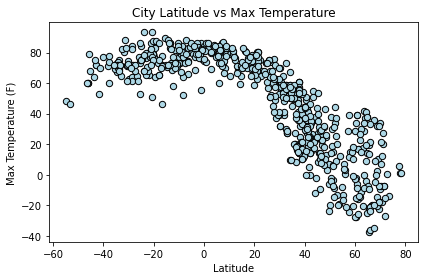

In [32]:
# lat_v_temp.plot(kind="scatter", x=lat, y=temp, grid=True, figsize=(9,9),
#               title="City Latitude Vs Max Temperature ", marker='o')
plt.scatter(lat, temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('City Latitude vs Max Temperature')
plt.tight_layout()
plt.show()

In this scatter comparison we show how temperature changes as latitude changes. We show an inverted porabola with 0 (degrees) looking to be the center. That makes sense as we'd expect the hottest temperatures closest to the equator.

## Latitude vs. Humidity Plot

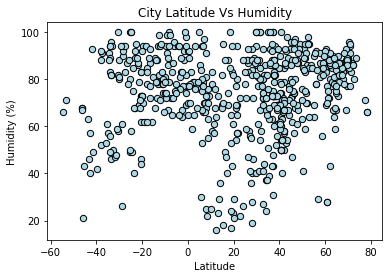

In [18]:
plt.scatter(lat, hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity')
plt.tight_layout
plt.show()

This scatter shows how humidity changes as latitude changes. There appears to be a constant correlation. This may be due to most places being surrounded by water.

## Latitude vs. Cloudiness Plot

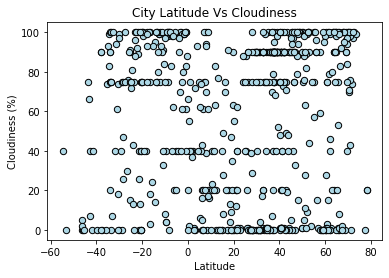

In [19]:
plt.scatter(lat, clo, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness')
plt.tight_layout
plt.show()

This scatter shows how cloudiness changes as latitude changes. The clouds occur in packs constantly over changing latitudes. The latitude my not be what is effecting the cloudiness as much as the change in terrain changes cloudiness.

## Latitude vs. Wind Speed Plot

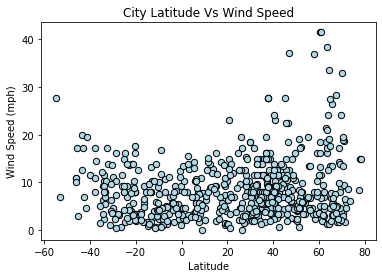

In [20]:
plt.scatter(lat, wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude Vs Wind Speed')
plt.tight_layout
plt.show()

This scatter shows how windspeed changes as latitude changes. Windspeed appears to be in a fairly constant range all around the world. Maybe that could possibly just be from the worlds natural rotation.

## Linear Regression

In [21]:
north_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
south_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
south_hem

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,taolanaro,-25.0225,46.9854,75.2,100,75,9.22,MG,1613097454
3,itarema,-3.03186,-39.8579,78.13,83,100,9.17,BR,1613097454
4,bambous virieux,-20.3439,57.7637,78.8,73,75,8.05,MU,1613097455
6,coruripe,-10.125,-36.1761,76.82,81,8,9.15,BR,1613097455
7,port elizabeth,-33.9608,25.6022,75.2,83,20,10.36,ZA,1613097455
...,...,...,...,...,...,...,...,...,...
612,tsienyane,-21.03,24.3995,71.89,68,100,3.29,BW,1613097528
614,iaciara,-14.1015,-46.6339,72.07,88,100,1.36,BR,1613097528
622,morrope,-6.54134,-80.013,73.99,87,98,1.99,PE,1613097529
625,sundumbili,-29.133,31.3799,69.8,94,40,2.3,ZA,1613097529


In [22]:
nor_lat =north_hem['Latitude'].astype('float64')
nor_long = north_hem['Longitude'].astype('float64')
nor_temp = north_hem['Max Temp'].astype('float64')
nor_hum = north_hem['Humidity'].astype('float64')
nor_clo = north_hem['Cloudiness'].astype('float64')
nor_wds = north_hem['Wind Speed'].astype('float64')
nor_lat

0      65.613456
1      37.251852
5      50.461921
8      42.652579
11     28.618351
         ...    
623    63.751967
624    37.777656
626    59.358460
627    42.038509
628     6.573360
Name: Latitude, Length: 451, dtype: float64

In [23]:
so_lat = south_hem['Latitude'].astype('float64')
so_long = south_hem['Longitude'].astype('float64')
so_temp = south_hem['Max Temp'].astype('float64')
so_hum = south_hem['Humidity'].astype('float64')
so_clo = south_hem['Cloudiness'].astype('float64')
so_wds = south_hem['Wind Speed'].astype('float64')
so_lat

2     -25.022531
3      -3.031859
4     -20.343862
6     -10.125006
7     -33.960837
         ...    
612   -21.029991
614   -14.101544
622    -6.541343
625   -29.133038
629   -17.925330
Name: Latitude, Length: 173, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R Value is:-0.8479906935987634


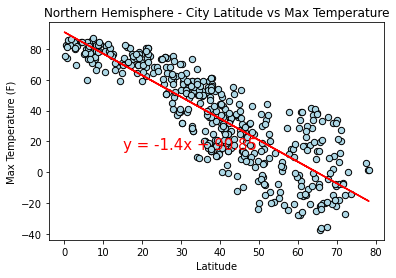

In [24]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_temp)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Northern Hemisphere - City Latitude vs Max Temperature')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(15,15),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

This scatter shows how locations in the northern hemispher's max temperature change as the latitude changes. This makes sense as the hottest temperatures would be at the equator and then cool down as latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R Value is:0.4014573074655087


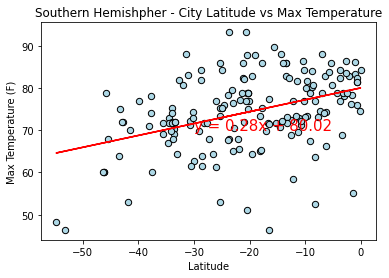

In [25]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_temp)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Southern Hemishpher - City Latitude vs Max Temperature')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

This scatter shows how the southern hemispher location's max temperature changes as latitude changes. The southern hemisphere does not have as wide of a range of latitudes as the north. The max temperature range is wide but there could be possibly more changes in altitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R Value is:0.2635155244044843


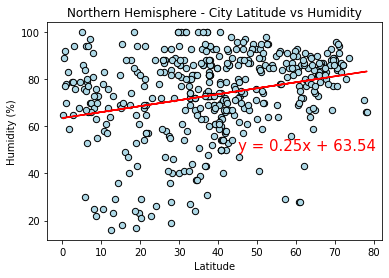

In [26]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_hum)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Northern Hemisphere - City Latitude vs Humidity')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

Humidity appears to be constant as latitude changes in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R Value is:0.35156461395575983


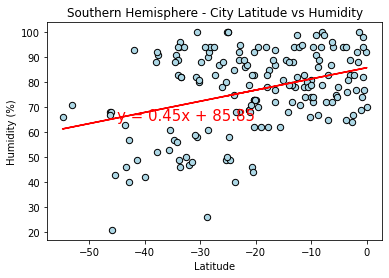

In [27]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_hum)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Southern Hemisphere - City Latitude vs Humidity')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-45,65),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

Humidity does not appear to be correlated to latitude change in the southern hemisphere. The R value shows low correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R Value is:0.2513788107453075


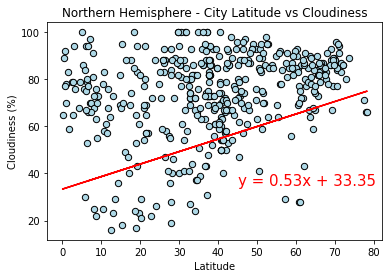

In [28]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_clo)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Northern Hemisphere - City Latitude vs Cloudiness')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

In [ ]:
Cloudiness does not appear to be correlated to changes in the latitude in the northern hemispher. The R value shows low correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R Value is:0.33564814104207424


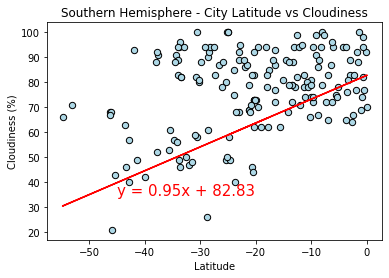

In [29]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_clo)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Southern Hemisphere - City Latitude vs Cloudiness')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

In [ ]:
The locations in the southern value also do not appear to have a correlation between cloudiness and latitude change. The range seems to lie between 70%-100%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The R Value is:0.1713878100856027


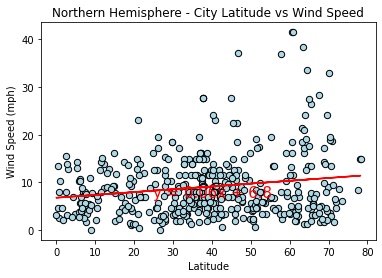

In [30]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_wds)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Northern Hemisphere - City Latitude vs Wind Speed')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(25,7),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

In [ ]:
Wind speed appears to stay constant as latitude changes in the northern hemispher.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The R Value is:-0.38244891236418566


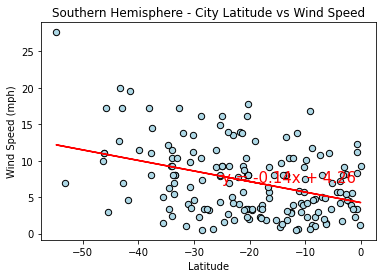

In [31]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_wds)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Southern Hemisphere - City Latitude vs Wind Speed')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

In [ ]:
Just using the eyeball test, wind speed appears to have more variance between the speed in the southern hemispher versus in the northern hemisphere.